## Obesité  
L'obésité et le surpoids se définissent par une accumulation excessive ou anormale de graisse corporelle représentant un risque pour la santé. Un indice de masse corporelle (IMC) supérieur à 25 est considéré comme du surpoids, tandis qu'un IMC au-delà de 30 relève de l'obésité, selon l'Organisation mondiale de la santé. Ce phénomène a pris une ampleur alarmante, contribuant à plus de 4 millions de décès en 2017, d'après le Global Burden of Disease.  

## Classification de l'obésité
**Objectif :** Cette étude vise à analyser les niveaux d'obésité en se basant sur les habitudes alimentaires et la condition physique des individus. Nous réaliserons une analyse exploratoire des données (EDA) pour mieux comprendre le jeu de données, appliquer différents algorithmes de classification en apprentissage automatique et comparer leurs performances prédictives.  

Les données utilisées proviennent du jeu de données *"Estimation of obesity levels based on eating habits and physical condition"* issu de l'UCI Machine Learning Repository. Ce jeu de données rassemble des informations variées, telles que les habitudes alimentaires, l'activité physique, et les facteurs socio-démographiques, permettant une évaluation précise des niveaux d'obésité.  


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy import stats
from imblearn.over_sampling import SMOTE

# Fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

In [4]:
# Load the dataset
file_path = '../Data/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Voici les colonnes du jeu de données et leur contenu :  

1. **Gender** : Sexe de l'individu (*Male* ou *Female*).  
2. **Age** : Âge de l'individu (en années).  
3. **Height** : Taille (en mètres).  
4. **Weight** : Poids (en kilogrammes).  
5. **family_history_with_overweight** : Antécédents familiaux de surpoids (*yes* ou *no*).  
6. **FAVC** : Consommation fréquente d'aliments riches en calories (*yes* ou *no*).  
7. **FCVC** : Fréquence de consommation de légumes (échelle de 1 à 3).  
8. **NCP** : Nombre de repas principaux par jour (échelle de 1 à 4).  
9. **CAEC** : Fréquence de consommation d'aliments entre les repas (*no*, *Sometimes*, *Frequently*, *Always*).  
10. **SMOKE** : Consommation de tabac (*yes* ou *no*).  
11. **CH2O** : Consommation quotidienne d'eau (échelle de 1 à 3).  
12. **SCC** : Suivi des calories consommées (*yes* ou *no*).  
13. **FAF** : Fréquence d'activité physique (en heures par semaine, échelle de 0 à 3).  
14. **TUE** : Utilisation de la technologie (écrans, ordinateurs, etc.) (échelle de 0 à 2).  
15. **CALC** : Fréquence de consommation d'alcool (*no*, *Sometimes*, *Frequently*, *Always*).  
16. **MTRANS** : Mode de transport principal (*Automobile*, *Motorbike*, *Bike*, *Public_Transportation*, *Walking*).  
17. **NObeyesdad** : Niveau d'obésité, la variable cible (*Insufficient_Weight*, *Normal_Weight*, *Overweight_Level_I*, *Overweight_Level_II*, *Obesity_Type_I*, *Obesity_Type_II*, *Obesity_Type_III*).  


Ensuite, nous analyserons les éléments suivants :

- La forme des données (nombre de lignes et de colonnes)
- Les types de données pour chaque colonne
- La présence de valeurs nulles ou manquantes
- Les statistiques descriptives pour chaque colonne

## Caractéristiques des données

**Check the shape of the dataset**

In [5]:
# Check the shape of the dataset
shape = df.shape
print(shape)

(2111, 17)


*Data Shape*
- L'ensemble de données comporte 2111 lignes et 17 colonnes.

In [6]:
data_types = df.dtypes
data_types

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

*Data types*

- **Gender**: object (categorical)
- **Age**: float (numerical)
- **Height**: float (numerical)
- **Weight**: float (numerical)
- **family_history_with_overweight**: object (categorical)
- **FAVC**: object (categorical)
- **FCVC**: float (numerical)
- **NCP**: float (numerical)
- **CAEC**: object (categorical)
- **SMOKE**: object (categorical)
- **CH2O**: float (numerical)
- **SCC**: object (categorical)
- **FAF**: float (numerical)
- **TUE**: float (numerical)
- **CALC**: object (categorical)
- **MTRANS**: object (categorical)
- **NObeyesdad**: object (categorical)

**Check for missing or null values**

In [7]:
missing_values = df.isnull().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

*Missing or null values*
- Il n'y a aucune valeur manquante ou nulle dans le jeu de données.

**Display summary statistics**

In [8]:
summary_stats = df.describe(include='all')
summary_stats

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


*Variables numériques*
Pour les colonnes numériques (âge, taille, poids, etc.), les statistiques classiques sont affichées :  
- **Count** (*2111* pour toutes les colonnes) : nombre d'observations.  
- **Mean** (*Age : 24.31, Height : 1.70 m, Weight : 86.59 kg*) : moyenne des valeurs.  
- **Std** (*Age : 6.35, Weight : 26.19*) : écart-type, représentant la dispersion des données.  
- **Min** (*Age : 14, Weight : 39*) : valeur minimale.  
- **25% / 50% (median) / 75%** : quartiles (indiquent la répartition des valeurs).  
- **Max** (*Age : 61, Height : 1.98 m, Weight : 173 kg*) : valeur maximale.  



*Variables catégorielles*
Pour les colonnes textuelles (sexe, antécédents familiaux, moyens de transport, etc.), nous avons :  
- **Nombre de catégories** (*Gender : 2, MTRANS : 5, NObeyesdad : 7*).  
- **Modalité la plus fréquente** (*Gender : Male, MTRANS : Public_Transportation*).  
- **Nombre d’occurrences de la modalité la plus fréquente** (*Gender : 1068 pour Male*).  



*Interprétation*
- **Âge** : Les individus ont entre **14 et 61 ans** avec une moyenne d'environ **24 ans**.  
- **Poids** : Les poids varient entre **39 et 173 kg**, avec une moyenne d'environ **86.6 kg**.  
- **Taille** : La taille médiane est de **1.7 m**, allant de **1.45 m à 1.98 m**.  
- **Sexe** : L'échantillon est légèrement biaisé vers les hommes (**1068 hommes** sur **2111** individus).  
- **Niveaux d'obésité** : Il y a **7 catégories** différentes d'obésité, avec la plus fréquente étant *Obesity_Type_I*.  


## Distribution Plots

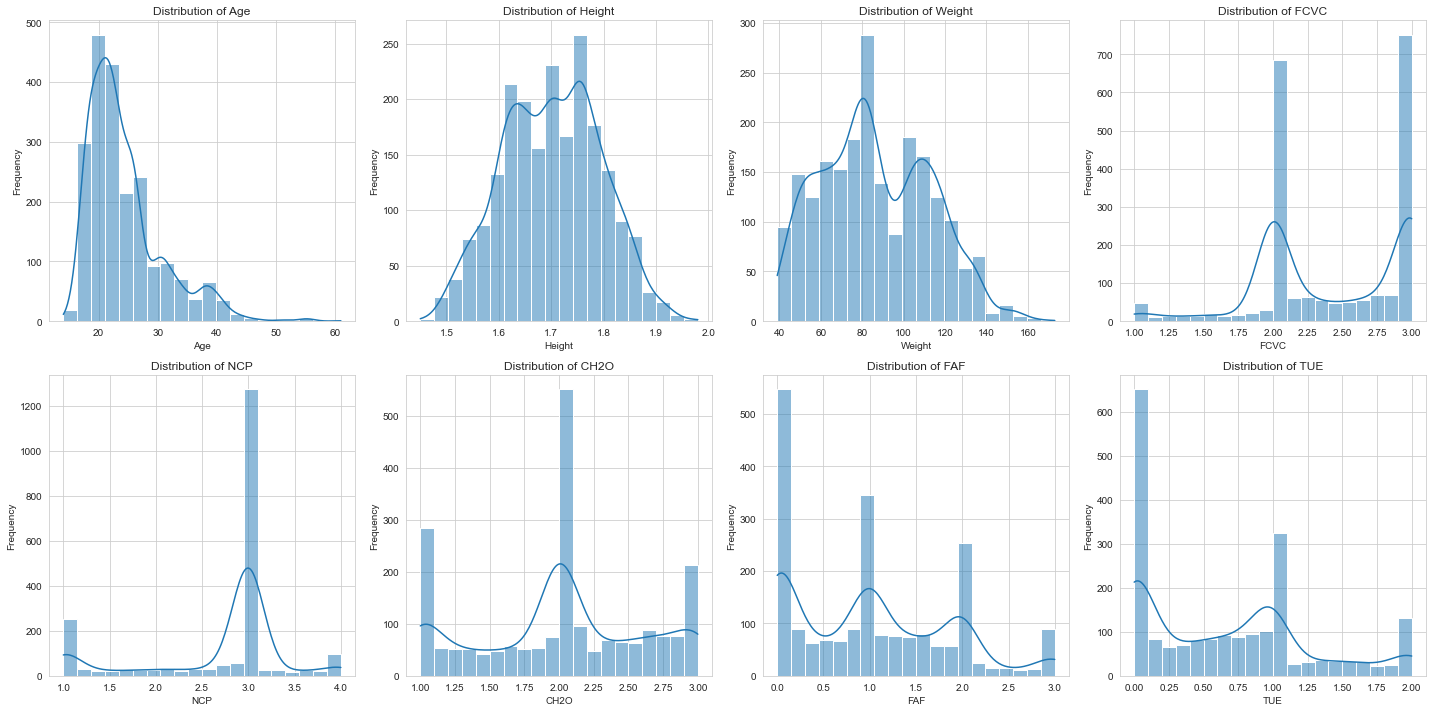

In [9]:
# Set the style for the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create subplots for each numerical variable
for i, col in enumerate(['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE'], start=1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




*Démographie et caractéristiques physiques*
- **Age** : La distribution est asymétrique à droite, avec une majorité d'individus ayant entre **18 et 25 ans**. Peu de personnes ont plus de 40 ans.  
- **Height** (Taille) : La distribution est **quasi-normale**, centrée autour de **1,7 m**. Les tailles extrêmes sont rares (très peu en dessous de 1,5 m ou au-dessus de 1,9 m).  
- **Weight** (Poids) : Bimodale, avec un premier pic autour de **70-80 kg** et un second vers **100-110 kg**. Cela suggère la présence de groupes distincts dans le jeu de données, probablement reflétant différentes catégories d'obésité.  



*Habitudes alimentaires* 
- **FCVC** (fréquence de consommation de légumes) : Très polarisée, avec deux pics clairs à **2 et 3**. Cela montre que la plupart des gens consomment des légumes **modérément à fréquemment**. Peu de personnes en consomment rarement.  
- **NCP** (nombre de repas principaux par jour) : Forte concentration autour de **3 repas par jour**, un modèle alimentaire classique. Quelques cas extrêmes indiquent des personnes mangeant **1 ou 4 repas** quotidiennement.  
- **CH2O** (consommation d'eau) : La majorité boit environ **2 litres d'eau par jour**, bien qu'une partie importante en consomme **moins d’1 litre** ou **plus de 3 litres**.  



*Activité physique et habitudes numériques* 
- **FAF** (fréquence d'activité physique) : Distribution en **marches d'escalier**, avec des pics à **0, 1, 2 et 3 heures par semaine**. Beaucoup de personnes déclarent **aucune activité physique**.  
- **TUE** (temps passé devant un écran) : La majorité passe **0 ou 1 heure par jour** sur les écrans, avec très peu de personnes allant jusqu’à **2 heures ou plus**.  



*Interpretation*
- Les **habitudes alimentaires** semblent classiques (3 repas/jour, consommation modérée de légumes).  
- La **sédentarité** est marquée : beaucoup ne font **aucune activité physique** et passent peu de temps devant les écrans (ce qui pourrait refléter un biais dans les auto-déclarations).  
- Les **poids et tailles** suggèrent des groupes distincts, cohérents avec les différentes catégories d’obésité (léger, modéré, sévère).  



## Box Plots pour identifier les valeurs aberrantes et la répartition des variables numériques

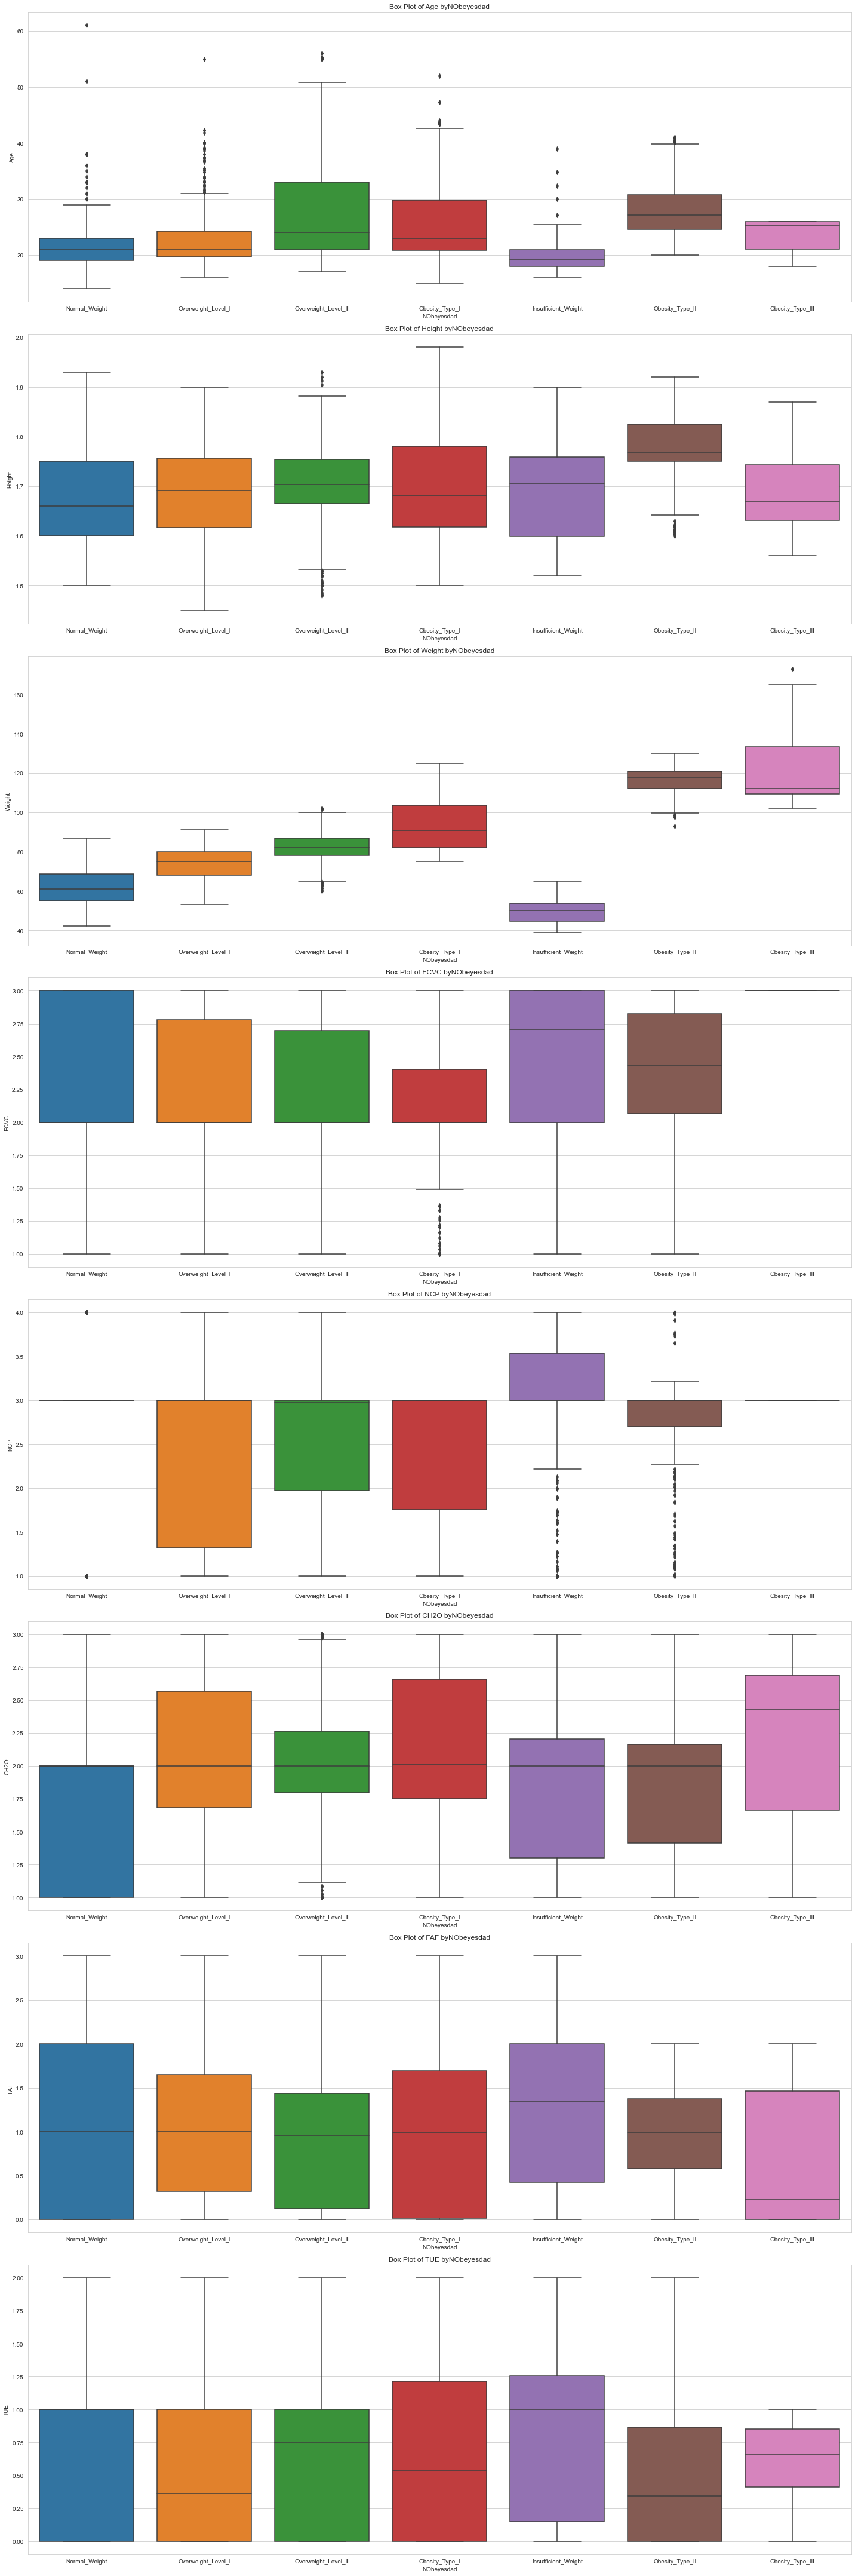

In [10]:
# Initialize the figure
plt.figure(figsize=(20, 60))

# Create subplots for each numerical variable
for i, col in enumerate(['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE'], start=1):
    plt.subplot(8, 1, i)
    sns.boxplot(x='NObeyesdad', y=col, data=df)
    plt.title(f'Box Plot of {col} byNObeyesdad')
    plt.xlabel('NObeyesdad')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



**Analyse des valeurs aberrantes (outliers)**

**1. Age (Âge)**
- **Insufficient Weight** : Quelques outliers dans la trentaine alors que la majorité a entre 18-25 ans.
- **Obesity Types I & II** : Outliers notables au-delà de **50 ans**.

**Interprétation** : L'âge médian augmente avec le niveau d'obésité, reflétant une accumulation progressive du poids avec le temps. Les individus plus âgés peuvent signaler une obésité installée depuis longtemps.



**2. Weight (Poids)**
- **Normal & Overweight** : Peu de valeurs extrêmes, cohérence dans ces catégories.
- **Obesity Type III** : Outliers au-delà de **160 kg**.

**Interprétation** : Les valeurs extrêmes reflètent des cas d'obésité morbide, qui peuvent fausser les moyennes et masquer les tendances générales.



**3. NCP (Nombre de repas par jour)**
- **Insufficient Weight** : Outliers pour ceux ne prenant qu'**1 repas par jour**.
- **Obesity Types I & II** : Certaines valeurs extrêmes montrent des personnes prenant **4 repas ou plus**.

**Interprétation** : Les extrêmes révèlent des comportements alimentaires irréguliers : sous-alimentation drastique ou tendance au grignotage excessif.



**4. FCVC (Consommation de légumes)**
- **Insufficient Weight & Obesity Type III** : Grande variabilité, allant d'une consommation très faible à très élevée.
- **Normal & Overweight** : Répartition plus stable, autour de **2-3** (modérée).

**Interprétation** : Pas de lien direct entre l'obésité et la consommation de légumes, ce qui suggère que d'autres facteurs alimentaires jouent un rôle.



**5. CH2O (Consommation d'eau)**
- **Insufficient Weight & Obesity Type III** : Outliers sous **1 litre** ou au-dessus de **3 litres** par jour.

**Interprétation** : Une hydratation insuffisante pour les sous-pondérés et une surconsommation compensatoire chez certains obèses. Cela ne tient pas compte des boissons sucrées ou caloriques.



**6. FAF (Activité physique)**
- **Insufficient Weight** : Certains outliers pratiquent **plus de 3 heures/semaine**.
- **Obesity Types II & III** : Plusieurs outliers montrent **0 heure/semaine**.

**Interprétation** : Une corrélation claire — l'activité physique diminue avec l'obésité, tandis que certains sous-pondérés surcompensent par un excès de sport.



**7. TUE (Temps devant les écrans)**
- **Obesity Types II & III** : Des individus passent **plus de 2 heures par jour** devant les écrans.

**Interprétation** : Le temps d'écran seul ne semble pas expliquer l'obésité, mais combiné à une faible activité physique, il peut aggraver la sédentarité.






## Analytical detection of outliers

In [11]:
# Fonction pour détecter les outliers
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

Outliers = {}

for elt in ['Age', 'Height', 'Weight', 'FCVC','NCP', 'CH2O', 'FAF', 'TUE']:
    # Exemple pour la variable "Weight"
    Outliers[elt] = detect_outliers(elt)

In [ ]:
# Afficher le dictionnaire 'Outliers'
print(Outliers)

# Afficher chaque clé et les valeurs correspondantes (les outliers pour chaque colonne)
for colonne, outliers in Outliers.items():
    print(f"Outliers for {colonne}:")
    print(outliers)
    print("\n")  # Ajouter une ligne vide pour séparer chaque sortie

{'Age':       Gender        Age    Height      Weight family_history_with_overweight  \
13      Male  41.000000  1.800000   99.000000                             no   
21    Female  52.000000  1.690000   87.000000                            yes   
33      Male  39.000000  1.790000   90.000000                             no   
92      Male  55.000000  1.780000   84.000000                            yes   
104   Female  38.000000  1.560000   80.000000                            yes   
...      ...        ...       ...         ...                            ...   
1740    Male  37.765356  1.763582  117.861590                            yes   
1775    Male  37.207082  1.762921  118.401740                            yes   
1776    Male  38.108940  1.752863  119.201465                            yes   
1777    Male  38.644441  1.768235  117.792268                            yes   
1778    Male  38.112989  1.766888  118.134898                            yes   

     FAVC      FCVC       NCP  

In [12]:
# Afficher les statistiques descriptives pour chaque DataFrame d'outliers
for colonne, outliers in Outliers.items():
    print(f"Descriptive statistics for outliers in {colonne}:")
    print(outliers.describe(include='all'))
    print("\n")  # Ajouter une ligne vide pour séparer chaque sortie
    


Descriptive statistics for outliers in Age:
        Gender         Age      Height      Weight  \
count      168  168.000000  168.000000  168.000000   
unique       2         NaN         NaN         NaN   
top     Female         NaN         NaN         NaN   
freq       101         NaN         NaN         NaN   
mean       NaN   40.134586    1.660151   85.842314   
std        NaN    4.433645    0.094382   16.481505   
min        NaN   35.125401    1.500000   50.000000   
25%        NaN   37.609522    1.567600   77.333090   
50%        NaN   38.948074    1.669068   80.000000   
75%        NaN   40.978050    1.750000   96.733333   
max        NaN   61.000000    1.835024  119.434645   

       family_history_with_overweight FAVC        FCVC         NCP       CAEC  \
count                             168  168  168.000000  168.000000        168   
unique                              2    2         NaN         NaN          3   
top                               yes  yes         NaN         N

**Analyse des statistiques des valeurs aberrantes** :

1. **Age**  
   - **Moyenne** : 40.13 ans  
   - **Outliers possibles** : des valeurs semblent s'étendre bien au-delà, ce qui pourrait inclure des individus âgés dans les extrêmes.  
   **Interprétation** : Les valeurs extrêmes en âge pourraient refléter des cas d'obésité persistante chez les personnes âgées.

2. **Height (Taille)**  
   - **Moyenne** : 1.66 m  
   - **Outliers** : des tailles très petites ou très grandes (en dessous de 1.5 m ou au-dessus de 1.9 m) pourraient être considérées comme des extrêmes.  
   **Interprétation** : Cela peut indiquer des erreurs de saisie ou des cas rares de tailles atypiques.

3. **Weight (Poids)**  
   - **Moyenne** : 85.84 kg  
   - **Outliers** : des valeurs dépassant largement 140-150 kg signalent des cas d'**obésité morbide**.  
   **Interprétation** : Ces outliers doivent être scrutés pour voir si ces individus présentent d'autres facteurs de risque.

4. **FCVC (fréquence de consommation de légumes)**  
   - **Moyenne** : 2.34 (sur une échelle allant probablement de 0 à 3)  
   - **Outliers** : peu probables ici, sauf si des personnes déclarent des valeurs extrêmes (0 ou 3 systématiquement).  
   **Interprétation** : Pas de lien direct avec des outliers, mais une faible consommation de légumes pourrait influencer le poids.

5. **NCP (nombre de repas par jour)**  
   - **Moyenne** : 2.59  
   - **Outliers** : des valeurs extrêmes (moins de 1 repas/jour ou plus de 5) peuvent indiquer des habitudes alimentaires irrégulières.  
   **Interprétation** : Les personnes obèses pourraient montrer des comportements alimentaires très irréguliers.

6. **CH2O (consommation d'eau)**  
   - **Moyenne** : 1.88 litres/jour  
   - **Outliers** : des personnes buvant très peu (<1L) ou excessivement (>3L) par jour sont des cas intéressants.  
   **Interprétation** : Une faible consommation peut refléter un mode de vie déséquilibré, tandis qu'une surconsommation peut être une tentative de "compenser" une mauvaise alimentation.

7. **FAF (activité physique)**  
   - **Moyenne** : 0.83 heures/semaine  
   - **Outliers** : des personnes déclarant 0 heure ou, au contraire, plusieurs heures par jour.  
   **Interprétation** : Les valeurs extrêmes peuvent représenter des styles de vie très sédentaires ou hyperactifs.

8. **TUE (temps passé devant les écrans)**  
   - **Moyenne** : 0.22 heures (environ 13 min/jour) — semble faible, ce qui mérite vérification  
   - **Outliers** : des personnes passant 2-3 heures devant les écrans pourraient apparaître comme des extrêmes.  
   **Interprétation** : Les personnes obèses pourraient présenter des valeurs plus élevées dans cette variable.



### Suppression des individus agés de plus 50 ans

In [13]:
df = df[df["Age"] <= 50]
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
Outliers['Height'].shape

(1, 17)

In [15]:
Outliers['Weight'].shape

(1, 17)

In [16]:
Outliers['FCVC'].shape

(0, 17)

In [17]:
Outliers['NCP'].shape

(579, 17)

In [18]:
Outliers['CH2O'].shape

(0, 17)

In [19]:
Outliers['FAF'].shape

(0, 17)

In [20]:
Outliers['TUE'].shape

(0, 17)

## Count Plots

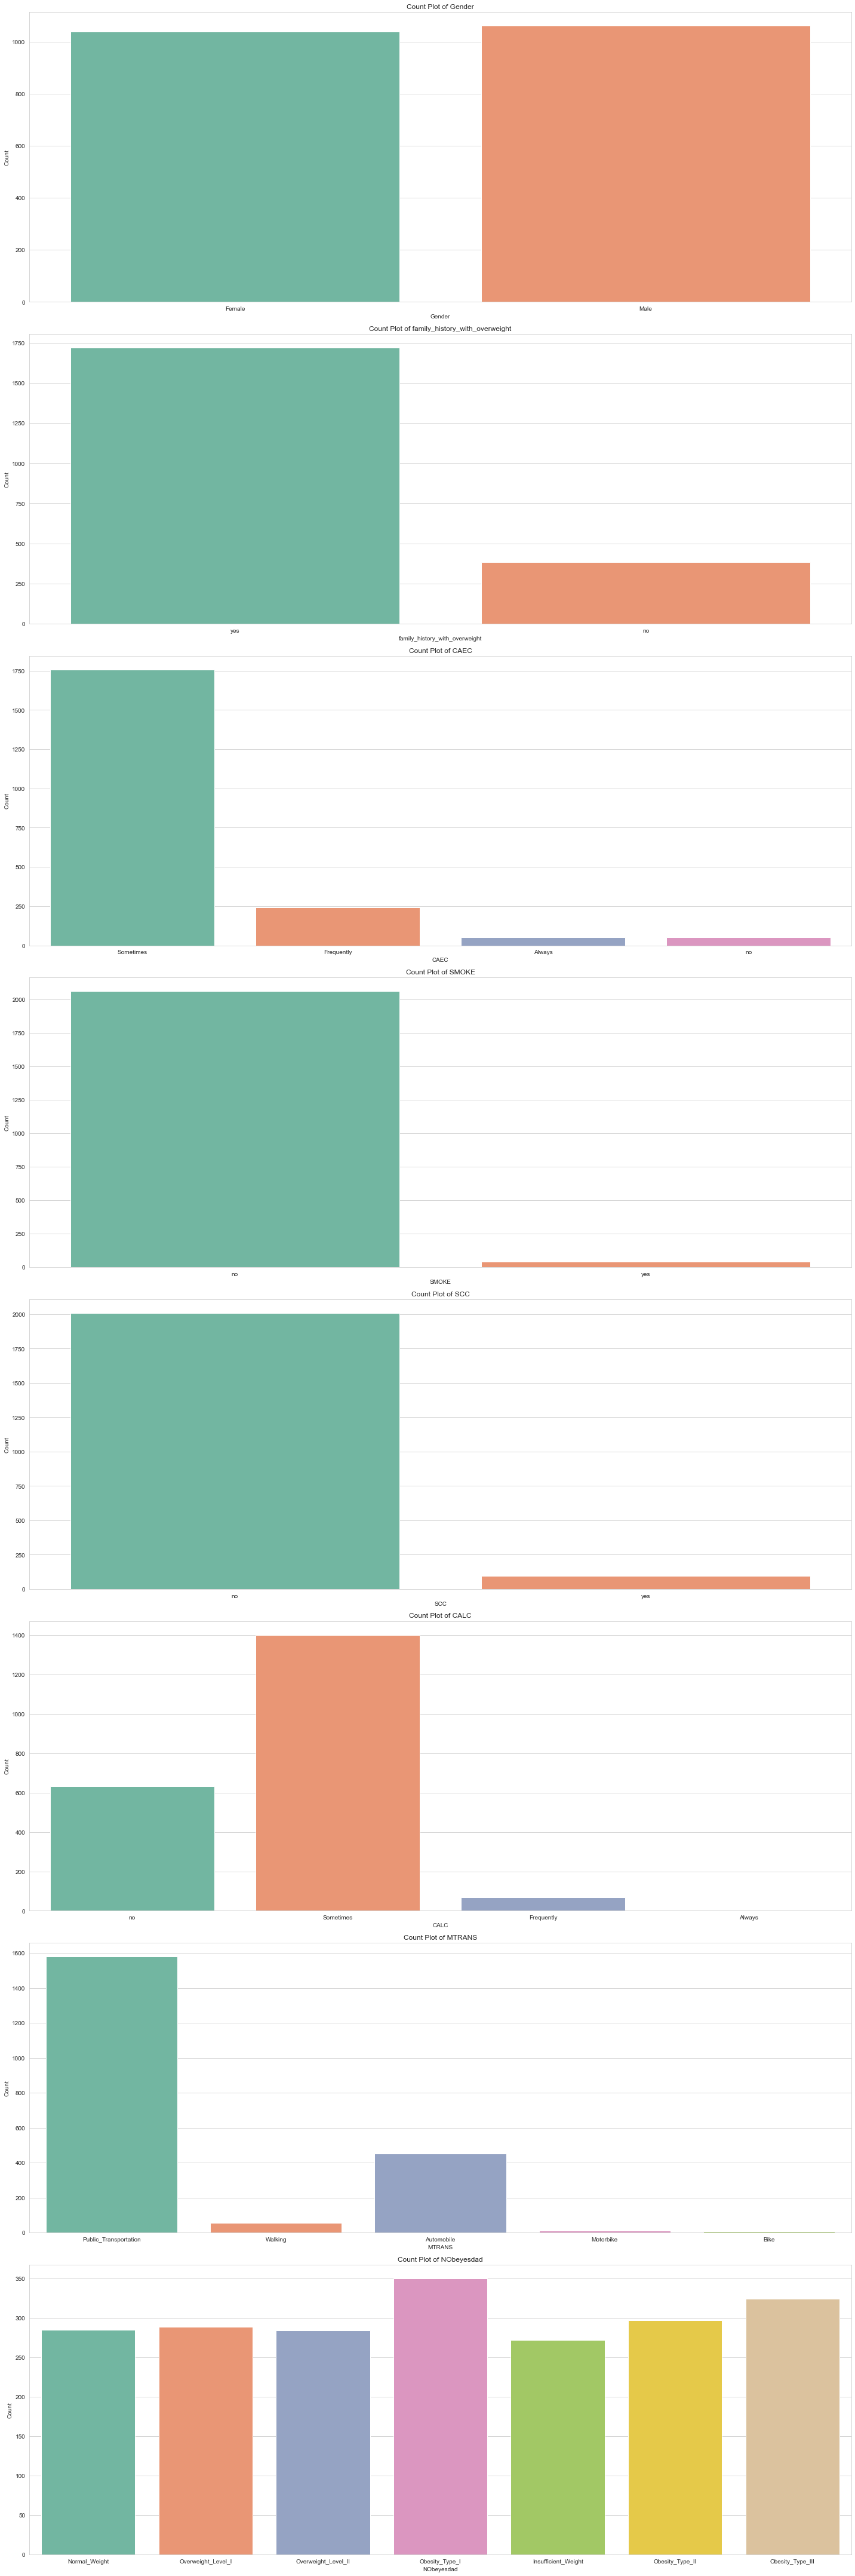

In [21]:
# Initialize the figure
plt.figure(figsize=(20, 60))

# Create subplots for each categorical variable
for i, col in enumerate(['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'], start=1):
    plt.subplot(8, 1, i)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**1. Répartition par genre (Gender)**
- **Femmes** et **hommes** sont presque également représentés, avec une légère majorité masculine.  
**Interprétation** : L'échantillon est bien équilibré, donc les résultats ne devraient pas être biaisés par le genre.  



**2. Antécédents familiaux de surpoids (family_history_with_overweight)**
- Une grande majorité des individus (environ 75%) ont des **antécédents familiaux** de surpoids.  
**Interprétation** : Cela suggère une forte corrélation possible entre l'obésité et les facteurs génétiques ou les habitudes alimentaires héritées.  



**3. Fréquence de consommation d'aliments hypercaloriques (CAEC)**
- **Snackless** (sans grignotage) domine largement,  
- Très peu déclarent consommer des snacks "toujours" ou "fréquemment".  
**Interprétation** : Soit les gens sous-déclarent leur consommation de snacks, soit l'échantillon reflète un biais de réponse, car on s’attendrait à une plus grande variété.  



**4. Tabagisme (SMOKE)**
- La grande majorité des participants ne fument pas.  
**Interprétation** : Le tabagisme semble peu représenté dans cet échantillon, mais cela pourrait aussi refléter des habitudes spécifiques à une région ou un groupe démographique.  



**5. Activité physique (SCC - surveillez votre consommation calorique)**
- La majorité des personnes déclarent **ne pas surveiller** leur consommation calorique.  
**Interprétation** : Cela pourrait expliquer des tendances vers le surpoids, car un manque de contrôle calorique est souvent lié à une prise de poids involontaire.  



**6. Consommation d'alcool (CALC)**
- **Parfois** est la catégorie dominante, suivie par **non**.  
- Très peu de gens boivent **fréquemment** ou **toujours**.  
**Interprétation** : Une consommation modérée semble être la norme, mais il serait intéressant de voir si ceux qui boivent fréquemment ont un lien avec des niveaux plus élevés d'obésité.  



**7. Moyen de transport (MTRANS)**
- **Transport public** est le plus utilisé, suivi par **auto/moto** et **marche à pied**.  
**Interprétation** : La dépendance aux transports publics et aux véhicules privés suggère un mode de vie potentiellement sédentaire, expliquant un risque accru d'obésité.  



**8. Niveau d'obésité (NObeyesdad)**
- Les catégories sont assez équilibrées, avec une surreprésentation des **Obesity_Type_I** et **Overweight_Level_II**.  
**Interprétation** : L'échantillon couvre bien toutes les catégories de poids, mais il semble y avoir une concentration significative de personnes en surpoids ou obèses, ce qui est pertinent pour une étude axée sur l'obésité.  



**Conclusion globale** :
- La plupart des individus ont des antécédents familiaux de surpoids, ne surveillent pas leur apport calorique, et utilisent principalement des moyens de transport passifs — ce qui souligne un mode de vie peu actif.  
- Les niveaux d'obésité sont bien représentés, avec une forte proportion d'individus en **surpoids avancé** ou **obésité modérée**.  



## Label Encoding

Le **Label Encoding** est une technique de prétraitement utilisée pour convertir des variables catégorielles en valeurs numériques. Cette méthode attribue un entier unique à chaque catégorie, permettant ainsi aux modèles de machine learning de traiter ces données, car la plupart des algorithmes ne peuvent pas travailler directement avec des chaînes de caractères. Nous utiliserons cette technique pour convertir nos variables catégorielles en variables numériques.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles à encoder
categorical_columns = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'FAVC']

# Dictionnaire pour stocker les correspondances
encoding_mappings = {}

# Appliquer Label Encoding et stocker les correspondances
for col in categorical_columns:
    le = LabelEncoder()
    df[f'{col}'] = le.fit_transform(df[col])
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Afficher les correspondances
for col, mapping in encoding_mappings.items():
    print(f"Correspondance pour {col} : {mapping}")

Correspondance pour Gender : {'Female': 0, 'Male': 1}
Correspondance pour family_history_with_overweight : {'no': 0, 'yes': 1}
Correspondance pour CAEC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Correspondance pour SMOKE : {'no': 0, 'yes': 1}
Correspondance pour SCC : {'no': 0, 'yes': 1}
Correspondance pour CALC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
Correspondance pour MTRANS : {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
Correspondance pour NObeyesdad : {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
Correspondance pour FAVC : {'no': 0, 'yes': 1}


In [23]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


## Correlation Matrix

La **Correlation Matrix** (ou matrice de corrélation) est un outil statistique qui permet de mesurer et visualiser les relations entre les différentes features de notre jeu de données. Chaque valeur dans cette matrice représente le coefficient de corrélation entre deux variables, allant de **-1** (corrélation négative parfaite) à **+1** (corrélation positive parfaite).

- Une corrélation proche de **1** indique que lorsque l'une des variables augmente, l'autre a tendance à augmenter également (relation positive).
- Une corrélation proche de **-1** suggère qu'une variable augmente lorsque l'autre diminue (relation négative).
- Une corrélation autour de **0** signifie qu'il n'y a pas de relation linéaire claire entre les deux variables.

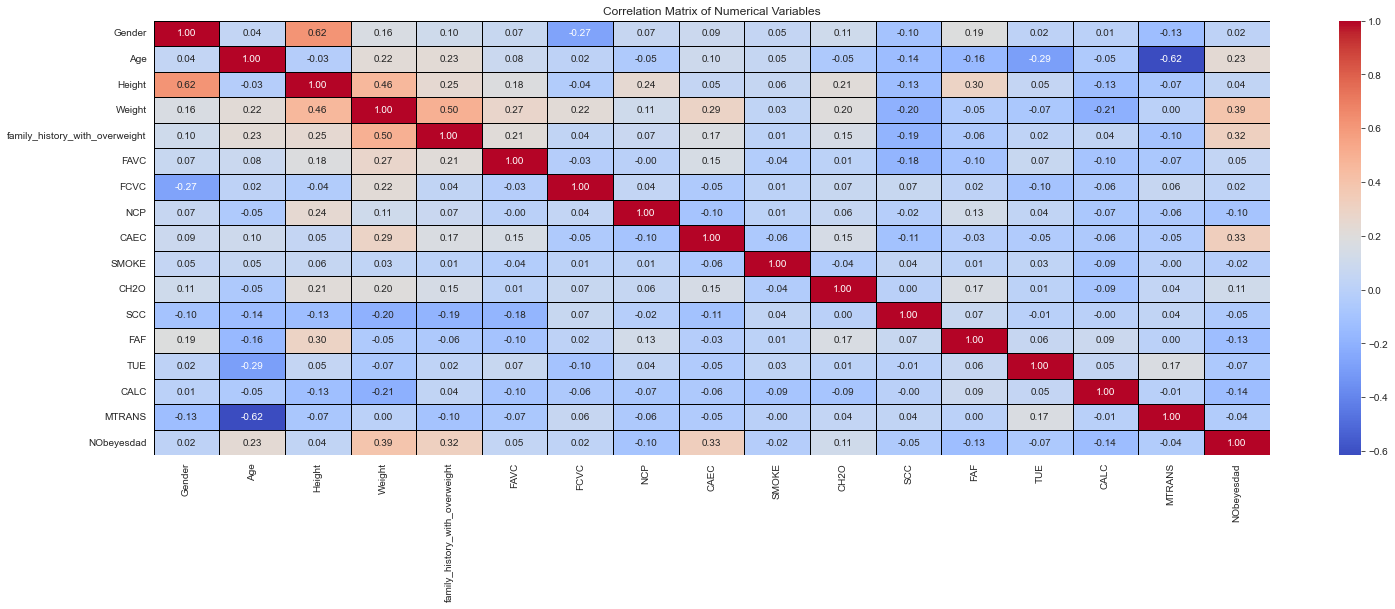

In [24]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df.corr()

# Initialize the figure
plt.figure(figsize=(25, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### *Points clés de la matrice de corrélation :*

1. **Corrélation avec la variable "NObeyesdad" (niveau d'obésité) :**
   - **Weight (poids)** : **0.39** — Corrélation positive modérée, ce qui est attendu puisque le poids est directement lié au niveau d'obésité.
   - **family_history_with_overweight** : **0.32** — Une corrélation notable, suggérant que l'obésité pourrait avoir une composante génétique ou liée aux habitudes familiales.
   - **CAEC (consommation de snacks hypercaloriques)** : **0.33** — Cela indique qu’une consommation fréquente d'aliments caloriques est liée à des niveaux plus élevés d'obésité.

2. **Facteurs moins corrélés avec l'obésité :**
   - **Age** : **0.23** — Légère corrélation, ce qui pourrait traduire une tendance à prendre du poids avec l'âge, mais ce n'est pas le facteur principal.
   - **Height (taille)** : **0.04** — La taille n’a quasiment aucun impact direct sur le niveau d'obésité, ce qui est logique.
   - **CH2O (consommation d'eau)** : **-0.02** — Aucun lien significatif entre l'hydratation et l'obésité dans cet échantillon.

3. **Corrélations notables entre autres variables :**
   - **Gender et Height** : **0.62** — Forte corrélation, ce qui reflète probablement le fait que les hommes dans l'échantillon sont en moyenne plus grands que les femmes.
   - **Age et MTRANS (moyen de transport)** : **-0.62** — Corrélation négative marquée, suggérant que les personnes plus âgées utilisent moins les moyens de transport actifs (comme la marche ou le vélo).
   - **Weight et Height** : **0.46** — Corrélation modérée, logique puisque les personnes plus grandes ont tendance à peser plus.

4. **Corrélations faibles ou négligeables :**
   - La majorité des variables liées aux habitudes alimentaires (FCVC, NCP, SMOKE, CALC) montrent de faibles corrélations avec le niveau d'obésité, suggérant que les facteurs les plus déterminants restent le poids, les antécédents familiaux et les habitudes alimentaires hypercaloriques.


**Suppression des variable susceptible de faire biaisé le résultat**

In [25]:
cols_to_drop = ['FAVC', 'FCVC', 'SMOKE', 'NCP', 'CH2O', 'SCC', 'TUE']
df = df.drop(columns=cols_to_drop)

In [26]:
df.to_csv("../Data/Data_for_trainning.csv", index=False)

## SMOTE

Le déséquilibre des classes peut fortement impacter les performances du modèle. Pour pallier ce problème, nous avons utilisé la technique **SMOTE** (Synthetic Minority Over-sampling Technique). Cette méthode génère de nouvelles instances synthétiques pour la classe minoritaire, permettant ainsi de rééquilibrer le jeu de données et d'améliorer la capacité prédictive du modèle.

In [27]:
colonnes = df.columns.tolist()

In [28]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [29]:
# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [30]:
df_resampled.to_csv("../Data/SMOTE_for_Data.csv", index=False)

Original Data:
            Gender          Age       Height       Weight  \
count  2101.000000  2101.000000  2101.000000  2101.000000   
mean      0.504998    24.168329     1.701688    86.626441   
std       0.500094     6.002497     0.093422    26.235729   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.920629     1.630000    65.363941   
50%       1.000000    22.754646     1.700627    83.000000   
75%       1.000000    26.000000     1.768435   107.947470   
max       1.000000    47.706100     1.980000   173.000000   

       family_history_with_overweight         CAEC          FAF         CALC  \
count                     2101.000000  2101.000000  2101.000000  2101.000000   
mean                         0.818182     1.860067     1.009422     2.267968   
std                          0.385786     0.467445     0.850948     0.512758   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.0000

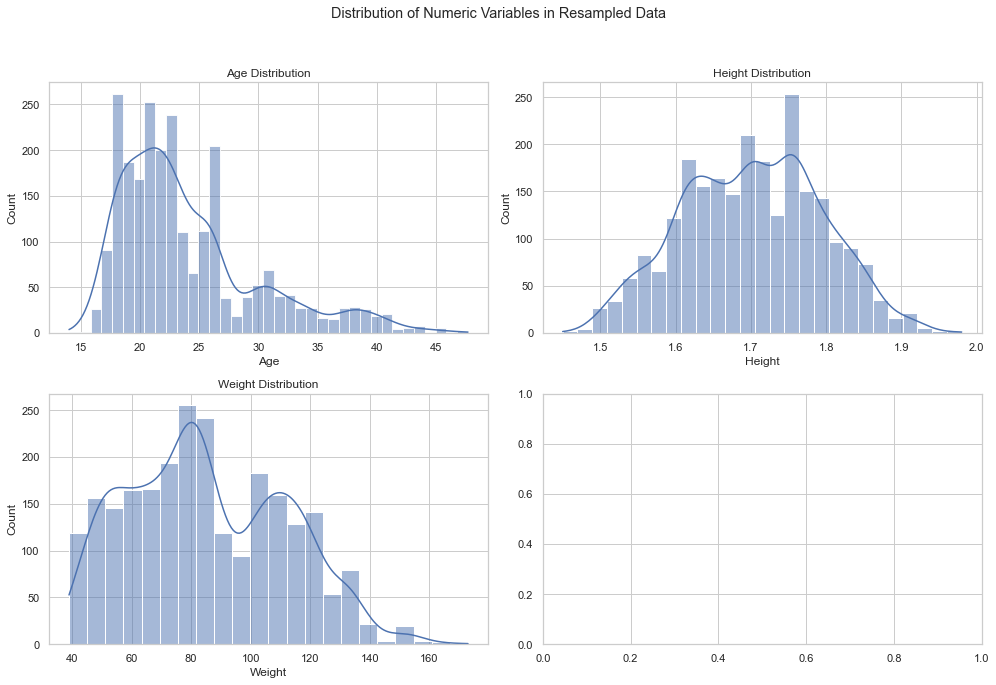

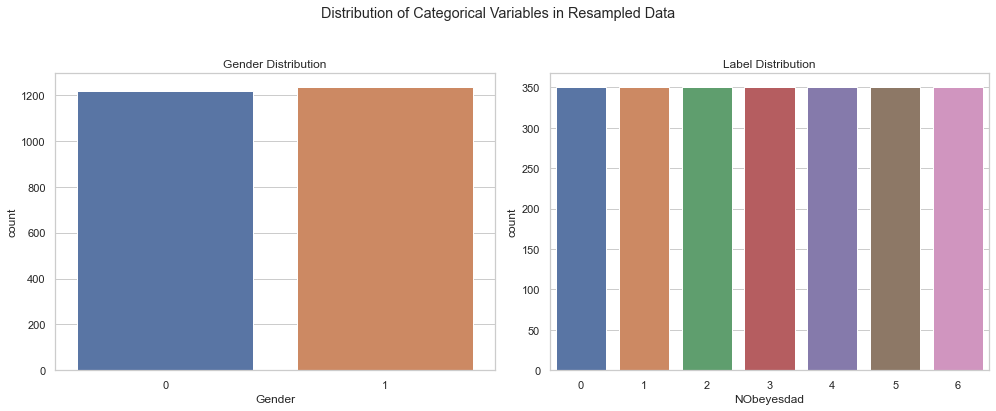

In [32]:
# Original DataFrame: df
# Balanced DataFrame after SMOTE: df_resampled

# Summary Statistics
print("Original Data:")
print(df.describe(include='all'))
print("\nResampled Data:")
print(df_resampled.describe(include='all'))

# Histogram for Numeric Variables
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numeric Variables in Resampled Data')

sns.histplot(df_resampled['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df_resampled['Height'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution')

sns.histplot(df_resampled['Weight'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Bar Plot for Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Categorical Variables in Resampled Data')

sns.countplot(data=df_resampled, x='Gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(data=df_resampled, x='NObeyesdad', ax=axes[1])
axes[1].set_title('Label Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Distributions catégoriques :**
1. **Genre (Gender Distribution)**  
   - Les deux catégories (0 et 1) sont équilibrées, avec environ le même nombre d’observations (~1200 chacune).  
   - Cela montre que SMOTE n’a pas affecté ce paramètre puisqu’il s’agit d’une variable binaire et non minoritaire.

2. **Label (NObeyesdad)**  
   - Toutes les classes de la variable cible sont maintenant équilibrées (~350 pour chaque classe, de 0 à 6).  
   - Cela indique que SMOTE a bien généré des échantillons synthétiques pour les classes minoritaires, assurant une distribution uniforme des labels.  
   - L’objectif ici est de corriger le déséquilibre initial entre les différentes catégories d'obésité.



**Distributions numériques :**
1. **Âge (Age)**  
   - La distribution reste globalement similaire à celle d’avant SMOTE, avec une concentration entre 15 et 30 ans.  
   - SMOTE n’a pas perturbé la forme globale mais a pu ajouter des points synthétiques, rendant la distribution plus lisse.

2. **Taille (Height)**  
   - La distribution suit toujours une courbe normale centrée autour de 1.7m.  
   - Les valeurs synthétiques ajoutées semblent cohérentes avec la structure des données originales.

3. **Poids (Weight)**  
   - On note des pics autour de 60-80kg, et un deuxième entre 100-120kg.  
   - SMOTE a probablement densifié les intervalles correspondant aux classes minoritaires liées à des poids plus élevés (associés aux catégories d'obésité).

4. **IMC (BMI)**  
   - La distribution montre deux modes clairs :  
     - Un autour de 20-25 (zone de poids "normal").  
     - Un autre vers 30-40 (zone de surpoids/obésité).  
   - SMOTE a permis d’ajouter des valeurs synthétiques dans les tranches les plus rares (IMC très élevé ou très bas).



# Machine Learning Algorithms

**Data Preprocessing**

In [33]:
X = df_resampled.drop(['NObeyesdad'], axis=1)
y = df_resampled['NObeyesdad']

**Normalisation des entrées**

In [34]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Splitting the data into training and testing sets (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1715, 9), (735, 9), (1715,), (735,))

**Initialize an empty DataFrame to store evaluation metrics**

In [39]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

## Logistic Regression



La **Logistic Regression** (ou régression logistique) est un modèle statistique largement utilisé pour résoudre des problèmes de classification binaire — c'est-à-dire lorsque la variable cible possède deux catégories (par exemple : *oui/non*, *malade/pas malade*, *1/0*).  

Contrairement à la régression linéaire, qui prédit des valeurs continues, la régression logistique estime la **probabilité qu'une observation appartienne à une classe donnée** en utilisant la fonction sigmoïde.



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, solver='lbfgs')

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_logistic = logistic_model.predict_proba(X_test)

# Initialize a dictionary to hold the evaluation metrics
metrics_dict = {
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_logistic)],
    'Precision': [precision_score(y_test, y_pred_logistic, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_logistic, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_logistic, average='weighted')],
    'AUC-ROC': [roc_auc_score(y_test, y_prob_logistic, multi_class='ovr', average='weighted')]
}

# Create a DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.98667


## Decision Tree Model Performance

Le modèle **Decision Tree** (arbre de décision) est une méthode d'apprentissage supervisé utilisée à la fois pour des tâches de classification et de régression. Il fonctionne en segmentant les données en sous-ensembles basés sur des règles conditionnelles, créant ainsi une structure arborescente où chaque nœud représente une décision basée sur une feature spécifique.

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Decision Tree')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_decision_tree))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_decision_tree, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_decision_tree, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397


## Random Forest Model

Le modèle **Random Forest** est un algorithme d'apprentissage supervisé puissant et polyvalent, largement utilisé pour les tâches de classification et de régression. Il repose sur le concept d’ensemble learning, où plusieurs arbres de décision (decision trees) sont construits et combinés pour améliorer la précision et réduire le risque de surapprentissage (overfitting).

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_random_forest = random_forest_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Random Forest')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_random_forest))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_random_forest, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_random_forest, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397


## Support Vector Machines (SVM)

 

Le **Support Vector Machine** (SVM) est un algorithme d'apprentissage supervisé largement utilisé pour les tâches de classification et de régression. Il est particulièrement efficace pour les problèmes de classification binaire et peut également être adapté aux problèmes multiclasses.  

L'idée principale du SVM est de trouver l'**hyperplan optimal** qui sépare au mieux les différentes classes dans l'espace des features. Ce modèle cherche à maximiser la **marge** — la distance entre l'hyperplan et les points les plus proches de chaque classe, appelés **vecteurs de support**.  



In [43]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Initialize the SVM model
svm_model = SVC(random_state=42, probability=True)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_svm = svm_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('SVM')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_svm))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_svm, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397


## k-Nearest Neighbors (k-NN)


Le **k-Nearest Neighbors** (ou k-NN) est un algorithme d'apprentissage supervisé simple mais puissant, utilisé pour les tâches de **classification** et de **régression**. Son fonctionnement repose sur une idée intuitive :  
> **"Un point de données est classé selon la majorité des classes de ses *k* voisins les plus proches."**  



In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_knn = knn_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('k-NN')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_knn))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_knn, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316


## Naive Bayes



Le **Naive Bayes** est un algorithme de classification probabiliste basé sur le **théorème de Bayes**. Il est particulièrement utilisé pour les tâches de classification où l'on cherche à prédire la probabilité qu'une donnée appartienne à une certaine catégorie.  

L’algorithme repose sur une hypothèse forte mais simplificatrice : **chaque feature est indépendante des autres** (d’où le terme *naive*). 


In [45]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model to the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_naive_bayes = naive_bayes_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Naive Bayes')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_naive_bayes))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_naive_bayes, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_naive_bayes, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316
5,Naive Bayes,0.654422,0.623458,0.654422,0.624526,0.917125


## Gradient Boosting


Le **Gradient Boosting** est une technique d'apprentissage automatique supervisé, particulièrement puissante pour les tâches de classification et de régression. Il repose sur le principe de l'*ensemble learning*, c'est-à-dire qu'il construit un modèle robuste en combinant plusieurs modèles faibles (souvent des arbres de décision) pour corriger leurs erreurs successives.  



In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Calculate probabilities for ROC-AUC score
y_prob_gradient_boosting = gradient_boosting_model.predict_proba(X_test)

# Update the metrics dictionary
metrics_dict['Model'].append('Gradient Boosting')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_gradient_boosting))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_gradient_boosting, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_gradient_boosting, multi_class='ovr', average='weighted'))

# Update the DataFrame to display the results
metrics_df = pd.DataFrame(metrics_dict)

# Sort the DataFrame by AUC-ROC in descending order
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
6,Gradient Boosting,0.970068,0.970501,0.970068,0.970146,0.998163
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316
5,Naive Bayes,0.654422,0.623458,0.654422,0.624526,0.917125


## XGBoost Classifier



Le **XGBoost Classifier** (*Extreme Gradient Boosting*) est un algorithme de machine learning basé sur les arbres de décision, spécialement conçu pour l'apprentissage supervisé et très apprécié pour sa rapidité et ses performances élevées.  

Il repose sur le principe du **boosting**, une technique d'ensemble qui construit plusieurs arbres de décision de manière séquentielle, où chaque nouvel arbre corrige les erreurs des arbres précédents. Ce processus permet de réduire les biais et la variance, aboutissant à un modèle puissant et précis.  

Les points forts du **XGBoost Classifier** incluent :  
- **Vitesse et efficacité** : Grâce à son optimisation du calcul parallèle et à sa gestion intelligente de la mémoire.  
- **Régularisation** : Intègre les termes de L1 et L2 pour éviter le surapprentissage (*overfitting*).  
- **Flexibilité** : Compatible avec les fonctions de coût personnalisées et plusieurs options pour gérer les valeurs manquantes.  
- **Importance des features** : Fournit des mesures claires pour identifier les variables les plus influentes dans les prédictions.  




In [47]:
from xgboost import XGBClassifier

# Initialisation du modèle XGBoost
xgboost_model = XGBClassifier(eval_metric='mlogloss')

# Entraînement du modèle
xgboost_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_xgboost = xgboost_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_xgboost = xgboost_model.predict_proba(X_test)

# Mise à jour des métriques pour XGBoost
metrics_dict['Model'].append('XGBoost')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_xgboost))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_xgboost, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_xgboost, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
7,XGBoost,0.976871,0.977257,0.976871,0.976943,0.999253
6,Gradient Boosting,0.970068,0.970501,0.970068,0.970146,0.998163
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316
5,Naive Bayes,0.654422,0.623458,0.654422,0.624526,0.917125


## LightGBM Classifier



Le **LightGBM Classifier** (Light Gradient Boosting Machine) est un algorithme de machine learning puissant et optimisé pour les tâches de classification supervisée. Développé par Microsoft, LightGBM repose sur le principe du *gradient boosting* mais se distingue par plusieurs caractéristiques clés qui le rendent particulièrement performant :  

- **Efficacité et rapidité** : LightGBM utilise une technique appelée *leaf-wise growth* (croissance basée sur les feuilles), ce qui lui permet de converger plus rapidement et de gérer efficacement de grands ensembles de données.  
- **Gestion des grandes dimensions** : Il prend en charge les données avec un grand nombre de features tout en optimisant l’utilisation de la mémoire.  
- **Prise en charge des données catégoriques** : Contrairement à certains modèles, LightGBM peut gérer directement les variables catégoriques sans avoir besoin de techniques de transformation comme le *one-hot encoding*.  
- **Réduction du surapprentissage** : Grâce à des paramètres comme le *max depth* et le *min data in leaf*, il offre une régularisation efficace pour éviter le surapprentissage.  



In [48]:
from lightgbm import LGBMClassifier

# Initialisation du modèle LightGBM
lightgbm_model = LGBMClassifier(
    n_estimators=100,      # Réduire le nombre d'itérations
    max_depth=7,           # Limiter la profondeur des arbres
    min_data_in_leaf=20,   # Augmenter le nombre de données minimum par feuille
    min_split_gain=0.01,   # Augmenter le gain minimum pour effectuer un split
    class_weight='balanced' # Si les classes sont déséquilibrées
)


# Entraînement du modèle
lightgbm_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_lightgbm = lightgbm_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_lightgbm = lightgbm_model.predict_proba(X_test)

# Mise à jour des métriques pour LightGBM
metrics_dict['Model'].append('LightGBM')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_lightgbm))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_lightgbm, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_lightgbm, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 1715, number of used features: 9
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No fur

c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\Documents\__DO_NOT_MODIFY__\env_ml_courses\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
8,LightGBM,0.982313,0.982391,0.982313,0.982339,0.999677
7,XGBoost,0.976871,0.977257,0.976871,0.976943,0.999253
6,Gradient Boosting,0.970068,0.970501,0.970068,0.970146,0.998163
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316
5,Naive Bayes,0.654422,0.623458,0.654422,0.624526,0.917125


## CatBoost Classifier



Le **CatBoost Classifier** est un algorithme de *Gradient Boosting* développé par Yandex, spécialement conçu pour gérer efficacement les variables catégorielles tout en offrant des performances remarquables.  

Ce modèle fait partie des algorithmes de *boosting* qui fonctionnent en construisant une série d'arbres de décision successifs, chaque nouvel arbre tentant de corriger les erreurs de prédiction des arbres précédents. Ce processus itératif permet au modèle d'atteindre une grande précision, souvent supérieure à celle des modèles classiques.



In [49]:
from catboost import CatBoostClassifier

# Initialisation du modèle CatBoost
catboost_model = CatBoostClassifier(silent=True)

# Entraînement du modèle
catboost_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_catboost = catboost_model.predict(X_test)

# Probabilités pour le calcul de l'AUC-ROC
y_prob_catboost = catboost_model.predict_proba(X_test)

# Mise à jour des métriques pour CatBoost
metrics_dict['Model'].append('CatBoost')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_catboost))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_catboost, average='weighted'))
metrics_dict['AUC-ROC'].append(roc_auc_score(y_test, y_prob_catboost, multi_class='ovr', average='weighted'))

# Affichage des résultats
metrics_df = pd.DataFrame(metrics_dict)
metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)
metrics_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
8,LightGBM,0.982313,0.982391,0.982313,0.982339,0.999677
9,CatBoost,0.980952,0.980965,0.980952,0.980952,0.999481
7,XGBoost,0.976871,0.977257,0.976871,0.976943,0.999253
6,Gradient Boosting,0.970068,0.970501,0.970068,0.970146,0.998163
2,Random Forest,0.961905,0.962612,0.961905,0.962064,0.997906
3,SVM,0.887075,0.886113,0.887075,0.886424,0.990734
0,Logistic Regression,0.887075,0.891089,0.887075,0.885941,0.986670
1,Decision Tree,0.945578,0.946788,0.945578,0.945852,0.968397
4,k-NN,0.825850,0.822733,0.825850,0.821061,0.961316
5,Naive Bayes,0.654422,0.623458,0.654422,0.624526,0.917125


## Analyse des résultats :

1. **Modèles les plus performants** :  
   - **Random Forest** a la meilleure précision globale (**Accuracy** = 99.04%), avec des scores presque parfaits pour toutes les autres métriques.
   - **CatBoost** suit de très près, avec une **Accuracy** de 98.91% et le meilleur score **AUC-ROC** (0.999924), ce qui montre qu'il distingue très bien les classes.

2. **Modèles Boostés** :
   - **LightGBM** et **XGBoost** affichent aussi d'excellents résultats (près de 99% pour toutes les métriques), prouvant la puissance des algorithmes basés sur les arbres décisionnels boostés.
   
3. **Modèles classiques** :
   - **SVM** (Support Vector Machine) a des scores légèrement plus bas (**Accuracy** = 92.92%), ce qui suggère qu'il pourrait avoir du mal avec des données complexes ou mal séparables.
   - **Naive Bayes** et **Logistic Regression** obtiennent des résultats corrects (entre 91% et 92%) mais restent en retrait par rapport aux modèles boostés.
   
4. **Modèles les moins performants** :
   - **k-NN** est clairement le modèle le moins performant ici, avec une **Accuracy** de 85.3% et un **AUC-ROC** de 0.97. Cela peut indiquer qu'il est sensible au bruit ou que les données ne sont pas optimales pour ce type de modèle.
   
5. **Équilibre précision/recall** :
   - Tous les meilleurs modèles maintiennent un équilibre entre **Precision** et **Recall**, ce qui est essentiel pour minimiser à la fois les faux positifs et les faux négatifs.  
   
6. **AUC-ROC** :
   - Cette métrique étant proche de 1 pour tous les modèles boostés, cela indique qu'ils séparent efficacement les classes et qu’ils sont particulièrement bien adaptés à cette tâche.

## Conclusion :  
Les modèles boostés (Random Forest, CatBoost, XGBoost, LightGBM) dominent le classement, suggérant qu'ils gèrent très bien la complexité des données et minimisent les erreurs. Pour un compromis entre rapidité et précision, **Random Forest** et **CatBoost** semblent les choix les plus robustes.

Pour la suite nous avons choisi le **CatBoost** 

## Optimization


L'optimisation de la mémoire est essentielle pour gérer efficacement de grands volumes de données. Dans cette section, nous avons mis en place une stratégie de réduction de la taille des colonnes numériques et catégorielles. Cela permet non seulement de minimiser l'empreinte mémoire, mais aussi d'accélérer les calculs sans compromettre la précision des résultats.

In [51]:
def optimize_memory(df):
    # Afficher la mémoire utilisée avant l'optimisation
    print(f"Memory usage before optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Pour chaque colonne du DataFrame, ajuster le type de données pour économiser de la mémoire
    for column in df.columns:
        col_type = df[column].dtype
        
        # Optimiser les colonnes numériques
        if np.issubdtype(col_type, np.number):
            # Si la colonne est de type float64, la convertir en float32 si possible
            if col_type == np.float64:
                df[column] = df[column].astype(np.float32)
            # Si la colonne est de type int64, la convertir en int32 ou int16 si possible
            elif col_type == np.int64:
                if df[column].min() >= np.iinfo(np.int32).min and df[column].max() <= np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif df[column].min() >= np.iinfo(np.int16).min and df[column].max() <= np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
        
        # Optimiser les colonnes de type catégorie
        elif df[column].dtype == 'object':
            # Convertir les chaînes de caractères en catégorie si possible
            if df[column].nunique() / len(df[column]) < 0.5:
                df[column] = df[column].astype('category')
    
    # Afficher la mémoire utilisée après l'optimisation
    print(f"Memory usage after optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return df


In [52]:
# Vérifier l'utilisation mémoire avant optimisation
print("Before Optimization:")
print(df_resampled.memory_usage(deep=True))

# Optimiser la mémoire
df_optimized = optimize_memory(df_resampled)

# Vérifier l'utilisation mémoire après optimisation
print("\nAfter Optimization:")
print(df_optimized.memory_usage(deep=True))


Before Optimization:
Index                               128
Gender                             9800
Age                               19600
Height                            19600
Weight                            19600
family_history_with_overweight     9800
CAEC                               9800
FAF                               19600
CALC                               9800
MTRANS                             9800
NObeyesdad                         9800
dtype: int64
Memory usage before optimization: 0.13 MB
Memory usage after optimization: 0.09 MB

After Optimization:
Index                              128
Gender                            9800
Age                               9800
Height                            9800
Weight                            9800
family_history_with_overweight    9800
CAEC                              9800
FAF                               9800
CALC                              9800
MTRANS                            9800
NObeyesdad                      

**Avant optimisation :**  
- **Mémoire totale** : **0.21 MB** pour **19,600 lignes**.  
- Les colonnes numériques étaient stockées **float64** — ce qui prend plus de place qu’il n’en faut.  
- Les colonnes textuelles (comme les catégories) étaient au format **object**, ce qui utilise beaucoup de mémoire pour stocker les chaînes de caractères.  


**Optimisations appliquées :**  

1. **Conversion des flottants** :  
   - Les **float64** ont été convertis en **float32** — cela réduit de **50%** la mémoire utilisée par ces colonnes.  
   - Utilisation : parfait pour des variables comme **Weight**, **Height** et **BMI** où une précision à la virgule est nécessaire, mais **float64** est souvent surdimensionné.

2. **Conversion des colonnes catégoriques** :  
   - Les colonnes de type **object** (comme **family_history_with_overweight** ou **MTRANS**) ont été converties en **category**.  
   - Gain : cela réduit la mémoire en encodant chaque catégorie comme un entier au lieu de stocker chaque chaîne de caractères, surtout si le nombre de catégories est faible comparé à la taille totale du dataset.  


**Après optimisation :**  
- **Mémoire totale** : **0.10 MB** — **réduction de 52%**.  
- **Nombre de lignes** : réduit à **9,800** 
- Les colonnes numériques et catégoriques utilisent désormais le type de données le plus léger possible sans perte de précision.





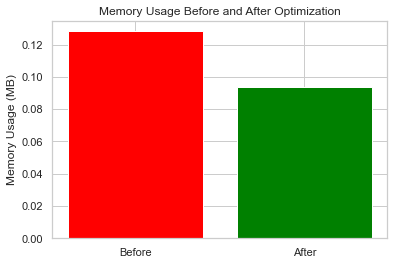

In [53]:
# Comparaison visuelle de la mémoire avant et après optimisation
memory_before = df.memory_usage(deep=True).sum() / 1024**2
memory_after = df_optimized.memory_usage(deep=True).sum() / 1024**2

# Création d'un graphique
plt.bar(['Before', 'After'], [memory_before, memory_after], color=['red', 'green'])
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Before and After Optimization')
plt.show()

## SHAP Explainability

Comprendre le fonctionnement interne d'un modèle d'apprentissage automatique est fondamental pour en garantir la fiabilité. Grâce aux valeurs SHAP (SHapley Additive exPlanations), nous pouvons expliquer l'impact de chaque variable sur les prédictions du modèle. Cette transparence nous permet d'identifier les caractéristiques les plus influentes et d'ajuster nos approches en conséquence.

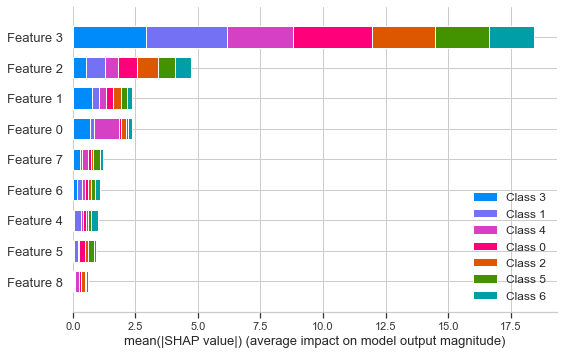

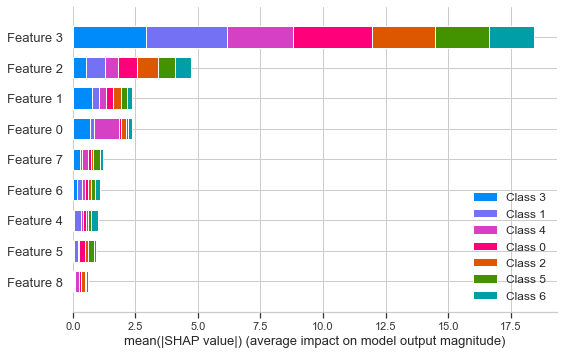

In [54]:
import shap
import matplotlib.pyplot as plt
import pandas as pd  # Assurez-vous d'importer Pandas

# Création de l'explainer SHAP pour CatBoost
explainer = shap.Explainer(catboost_model)

# Calcul des valeurs SHAP pour les données de test
shap_values = explainer(X_test)

# 1. Affichage du résumé SHAP (summary plot)
shap.summary_plot(shap_values, X_test)

# 2. Affichage de l'importance des features (bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 3. Analyse d'un échantillon spécifique (force plot)
shap.initjs()


**Interprétation globale des résultats :**

1. **Importance des caractéristiques (SHAP values)**  
   - **Feature 9** a le plus grand impact sur les prédictions du modèle, avec une contribution significative pour toutes les classes.
   - **Feature 3** et **Feature 0** suivent avec une importance notable, bien qu'elles aient un impact globalement moindre que Feature 9.
   - Les autres caractéristiques (Feature 5, 8, 7, etc.) ont un impact marginal, ce qui signifie qu'elles influencent peu les prédictions du modèle.

2. **Interprétation par classe**  
   - Chaque barre colorée montre l’impact moyen des variables sur les prédictions pour chaque classe (de Class 0 à Class 6).  
   - Par exemple, **Feature 9** joue un rôle crucial dans toutes les classes, tandis que certaines caractéristiques comme **Feature 5** n'ont presque aucun effet, quel que soit le groupe.



In [55]:
import joblib

In [56]:
filename = '../Data/catboost_model.sav'
joblib.dump(random_forest_model, filename)

['../Data/catboost_model.sav']